# Baseline

Código de ejemplo que muestra como procesar y extraer texto con un OCR.

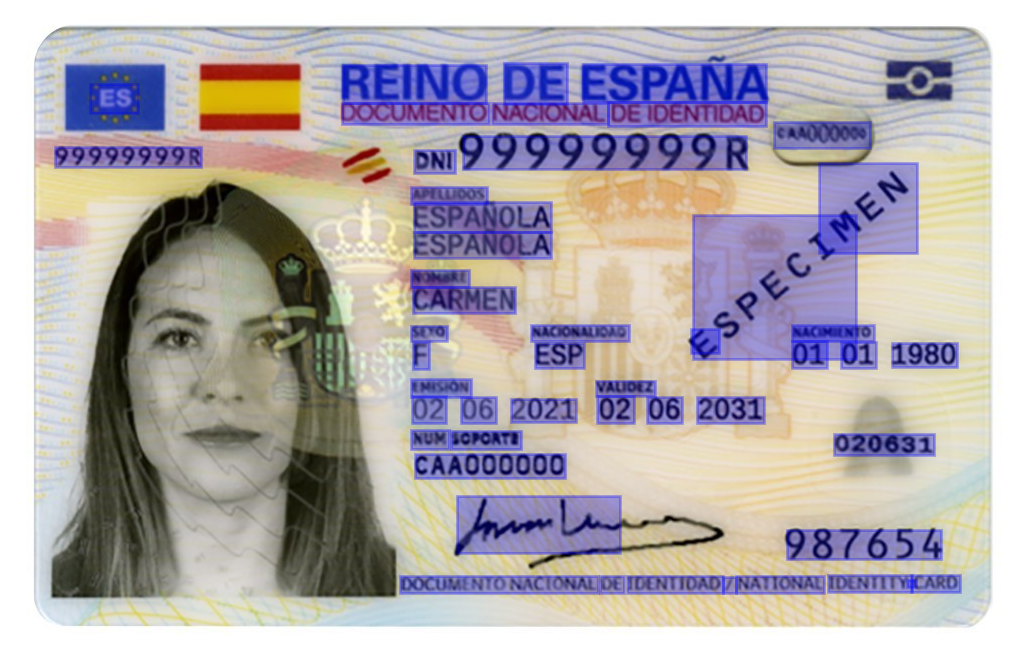

REINO DE ESPANA
ES
DOCUMENTO NACIONAL DEIDENTIDAD
CAA000000
99999999R
DNI 99999999R
APELLIDOS
ESPANOLA
HEN
ESPANOLA
NOMBRE
CARMEN
SEYO
NACIONALIDAD
C
NACIMIENTO

F
ESP
01 01 1980
EMISION
VAUIOLZ
02 06 2021 02 06 2031
NUM SOPORTI
020631
CAA000000

987654
DOCUMENTONACIONAL DE IDENTIDAD NATIONAL IDENTITY - CARD


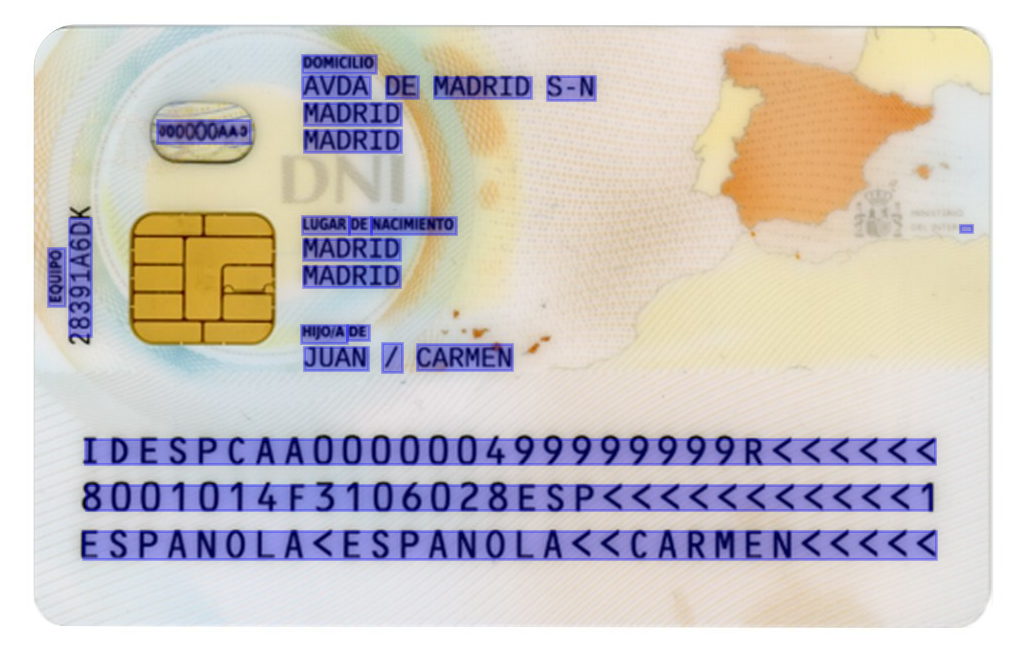

DOMICILIO
AVDA DE MADRID S-N
MADRID
J00000AAS
MADRID
LUGAR DE NACIMIENTO
-
MADRID
I -
MADRID
HIJO/A DE
JUAN / CARMEN
IDESPCA00000049999999R<<<<<
8001014F3106028ESP<<<<<<<<<<<1
ESPANOLASESPANOLAS<CARMENS<<<<<


In [3]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)

def extract_text(ocr_model, image_file_path: str):
    """Extrae el texto de una imagen a partir de un modelo OCR"""

    doc = DocumentFile.from_images(image_file_path)
    result = ocr_model(doc)
    return result

def show_ocr_result(result):
    """Muestra una imagen de resultado y el texto extraido"""

    # mostrar resultado
    result.show()

    # mostrar texto con mas de 50% de confianza
    for page in result.pages:
        for block in page.blocks:
            for line in block.lines:
                words = []
                for word in line.words:
                    if word.confidence > 0.5:
                        words.append(word.value)
                print(' '.join(words))

# extraer texto del front
text_front = extract_text(model, 'dni_front_especimen.jpg')
show_ocr_result(text_front)

# extraer texto del back
text_back = extract_text(model, 'dni_back_especimen.jpg')
show_ocr_result(text_back)
